# Climate change and it’s  impact  on human health in Latin America and the Caribbean

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
climate_data = pd.read_csv('C:\\Users\\n\\Downloads\\archive (14)\\LA_daily_climate.csv')
air_quality_data = pd.read_csv('C:\\Users\\n\\Downloads\\archive (14)\\LA_daily_air_quality.csv')
print("Datasets loaded successfully!")

Datasets loaded successfully!


In [72]:
climate_data.head()

,country,city,date,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,wind_speed_10m_max,et0_fao_evapotranspiration
0,Argentina,Buenos Aires,2020-01-01 00:00:00+00:00,-34.6037,-58.3816,24.767500,19.267500,21.973753,25.061949,18.268500,22.049086,0.6,24.336640,4.160744
1,Argentina,Buenos Aires,2020-01-02 00:00:00+00:00,-34.6037,-58.3816,24.217500,18.317501,21.259167,24.995867,17.999480,20.943785,1.8,27.609911,4.593965
2,Argentina,Buenos Aires,2020-01-03 00:00:00+00:00,-34.6037,-58.3816,25.117500,20.517500,22.373750,27.362978,20.149343,22.910418,0.1,24.203140,5.876242
3,Argentina,Buenos Aires,2020-01-04 00:00:00+00:00,-34.6037,-58.3816,25.617500,20.917501,23.177916,27.975208,21.116510,24.117735,0.0,20.833395,5.913107
4,Argentina,Buenos Aires,2020-01-05 00:00:00+00:00,-34.6037,-58.3816,27.167501,20.217500,24.225832,29.682999,22.054735,25.340597,0.0,18.486622,5.996509


In [73]:
air_quality_data.head()

,date,latitude,longitude,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone
0,2022-07-29 00:00:00+00:00,-34.6037,-58.3816,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-07-30 00:00:00+00:00,-34.6037,-58.3816,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-07-31 00:00:00+00:00,-34.6037,-58.3816,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-08-01 00:00:00+00:00,-34.6037,-58.3816,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-08-02 00:00:00+00:00,-34.6037,-58.3816,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# Convert date columns to datetime
climate_data['date'] = pd.to_datetime(climate_data['date'])
air_quality_data['date'] = pd.to_datetime(air_quality_data['date'])

# Merge datasets on date
merged_data = pd.merge(climate_data, air_quality_data, on='date')

# Check for missing values
print(merged_data.isnull().sum())
print("\nDatasets Merged successfully!")

country                          0
city                             0
date                             0
latitude_x                       0
longitude_x                      0
temperature_2m_max               0
temperature_2m_min               0
temperature_2m_mean              0
apparent_temperature_max         0
apparent_temperature_min         0
apparent_temperature_mean        0
precipitation_sum                0
wind_speed_10m_max               0
et0_fao_evapotranspiration       0
latitude_y                       0
longitude_y                      0
pm10                          2400
pm2_5                         2400
carbon_monoxide               2400
nitrogen_dioxide              2400
sulphur_dioxide               2400
ozone                         2400
dtype: int64

Datasets Merged successfully!


In [75]:
# Handle missing values (example: fill with mean)
merged_data.fillna(merged_data.mean(), inplace=True)
merged_data.head()

C:\Users\n\AppData\Local\Temp\ipykernel_12788\4283878792.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  merged_data.fillna(merged_data.mean(), inplace=True)
C:\Users\n\AppData\Local\Temp\ipykernel_12788\4283878792.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_data.fillna(merged_data.mean(), inplace=True)


,country,city,date,latitude_x,longitude_x,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,...,wind_speed_10m_max,et0_fao_evapotranspiration,latitude_y,longitude_y,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone
0,Argentina,Buenos Aires,2022-07-29 00:00:00+00:00,-34.6037,-58.3816,15.117499,5.0675,9.565415,13.197596,1.478436,...,24.408424,2.200393,-34.6037,-58.3816,20.669625,13.75853,414.904233,22.484069,8.930359,47.499201
1,Argentina,Buenos Aires,2022-07-29 00:00:00+00:00,-34.6037,-58.3816,15.117499,5.0675,9.565415,13.197596,1.478436,...,24.408424,2.200393,-19.0196,-65.2619,20.669625,13.75853,414.904233,22.484069,8.930359,47.499201
2,Argentina,Buenos Aires,2022-07-29 00:00:00+00:00,-34.6037,-58.3816,15.117499,5.0675,9.565415,13.197596,1.478436,...,24.408424,2.200393,-15.8267,-47.9218,20.669625,13.75853,414.904233,22.484069,8.930359,47.499201
3,Argentina,Buenos Aires,2022-07-29 00:00:00+00:00,-34.6037,-58.3816,15.117499,5.0675,9.565415,13.197596,1.478436,...,24.408424,2.200393,-33.4378,-70.6504,20.669625,13.75853,414.904233,22.484069,8.930359,47.499201
4,Argentina,Buenos Aires,2022-07-29 00:00:00+00:00,-34.6037,-58.3816,15.117499,5.0675,9.565415,13.197596,1.478436,...,24.408424,2.200393,4.7110,-74.0721,20.669625,13.75853,414.904233,22.484069,8.930359,47.499201


In [76]:
merged_data.tail()

,country,city,date,latitude_x,longitude_x,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,...,wind_speed_10m_max,et0_fao_evapotranspiration,latitude_y,longitude_y,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone
252795,Venezuela,Caracas,2024-04-20 00:00:00+00:00,10.4806,-66.9036,25.664,20.064,22.493166,29.464996,22.876022,...,6.989935,3.564099,8.9824,-79.5199,20.4,12.6,235.0,10.2,3.5,51.0
252796,Venezuela,Caracas,2024-04-20 00:00:00+00:00,10.4806,-66.9036,25.664,20.064,22.493166,29.464996,22.876022,...,6.989935,3.564099,-25.2637,-57.5759,8.5,6.0,237.0,8.8,0.9,37.0
252797,Venezuela,Caracas,2024-04-20 00:00:00+00:00,10.4806,-66.9036,25.664,20.064,22.493166,29.464996,22.876022,...,6.989935,3.564099,-12.0464,-77.0428,14.4,8.9,246.0,24.9,6.0,28.0
252798,Venezuela,Caracas,2024-04-20 00:00:00+00:00,10.4806,-66.9036,25.664,20.064,22.493166,29.464996,22.876022,...,6.989935,3.564099,-34.9011,-56.1645,4.5,3.1,169.0,8.8,2.0,38.0
252799,Venezuela,Caracas,2024-04-20 00:00:00+00:00,10.4806,-66.9036,25.664,20.064,22.493166,29.464996,22.876022,...,6.989935,3.564099,10.4806,-66.9036,15.1,10.7,491.0,18.0,3.4,31.0


# Exploratory Data Analysis (EDA)

Tasks:

Summary statistics (mean, median, standard deviation, etc.)
Visualize the data to identify patterns and trends over time.
Correlation analysis between climate variables and air quality.

In [77]:
# Summary statistics
print(merged_data.describe())

          latitude_x    longitude_x  temperature_2m_max  temperature_2m_min  \
count  252800.000000  252800.000000       252800.000000       252800.000000   
mean       -0.351840     -74.647240           25.999977           16.846128   
std        19.472891      12.945796            5.442958            5.894198   
min       -34.901100     -99.133200            8.536500           -0.613500   
25%       -16.624925     -84.627075           22.062875           12.186500   
50%         9.455250     -75.557450           26.738251           17.559500   
75%        14.212950     -66.493175           30.119125           21.640000   
max        23.113600     -47.921800           39.086998           30.536999   

       temperature_2m_mean  apparent_temperature_max  \
count        252800.000000             252800.000000   
mean             20.831073                 27.601000   
std               5.395853                  7.238239   
min               3.801083                  3.710053   
25%     

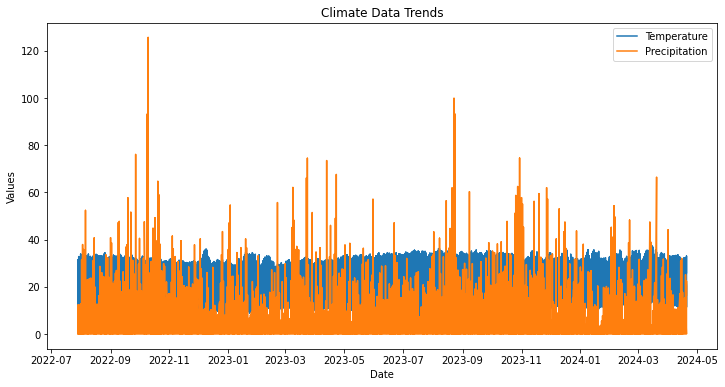

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['apparent_temperature_mean'], label='Temperature')
plt.plot(merged_data['date'], merged_data['precipitation_sum'], label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Climate Data Trends')
plt.legend()
plt.show()

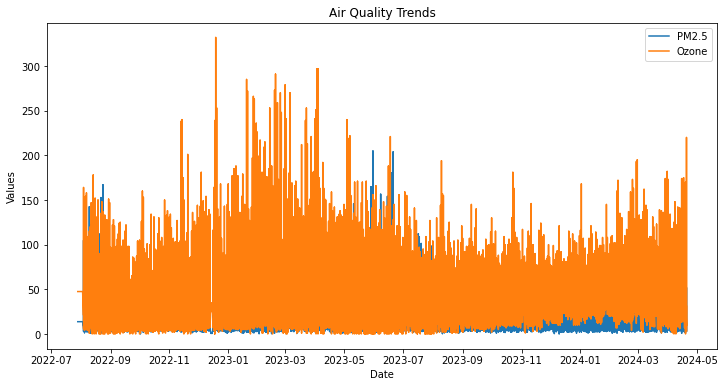

In [79]:
# Visualize air quality trends
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['pm2_5'], label='PM2.5')
plt.plot(merged_data['date'], merged_data['ozone'], label='Ozone')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Air Quality Trends')
plt.legend()
plt.show()

In [80]:
# Correlation analysis
correlation_matrix = merged_data.corr()
print(correlation_matrix)

                              latitude_x   longitude_x  temperature_2m_max  \
latitude_x                  1.000000e+00 -7.280196e-01        4.015154e-01   
longitude_x                -7.280196e-01  1.000000e+00       -1.528608e-01   
temperature_2m_max          4.015154e-01 -1.528608e-01        1.000000e+00   
temperature_2m_min          3.079852e-01 -7.416599e-03        8.166916e-01   
temperature_2m_mean         3.503371e-01 -5.264448e-02        9.364745e-01   
apparent_temperature_max    4.366761e-01 -1.350868e-01        9.544772e-01   
apparent_temperature_min    3.741362e-01 -6.083255e-02        8.076607e-01   
apparent_temperature_mean   4.048956e-01 -8.027904e-02        8.954023e-01   
precipitation_sum           6.205201e-02 -5.321352e-02       -1.292781e-01   
wind_speed_10m_max         -2.562243e-01  1.196294e-01        5.592401e-02   
et0_fao_evapotranspiration  1.227417e-01 -6.722292e-02        6.815848e-01   
latitude_y                  6.312329e-19  2.776673e-18        1.

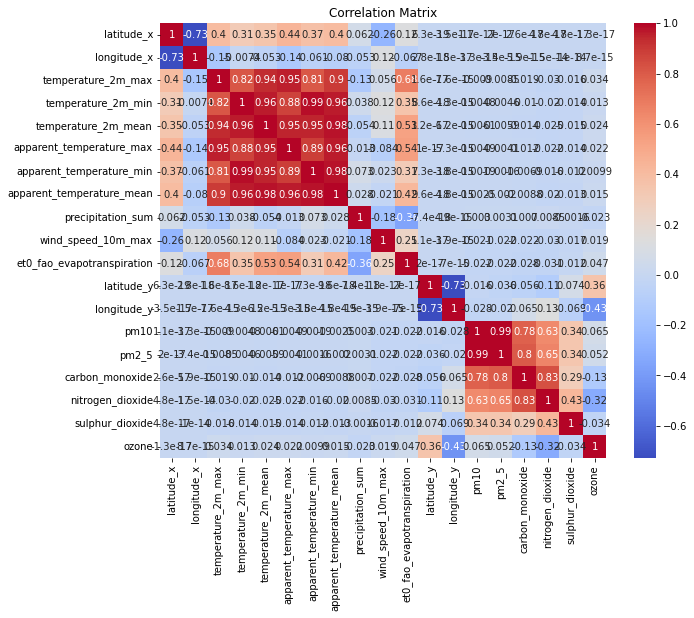

In [81]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Analysis of Climate Change Trends

Tasks:

Analyze temperature and precipitation trends over the years.
Identify any significant changes in climate variables over the study period.
Visualize trends using line plots, moving averages, etc.

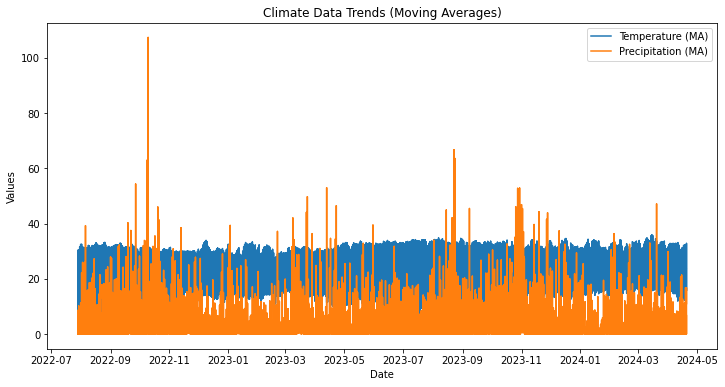

In [82]:
# Moving averages to smooth the trends
merged_data['temp_ma'] = merged_data['apparent_temperature_mean'].rolling(window=30).mean()
merged_data['precip_ma'] = merged_data['precipitation_sum'].rolling(window=30).mean()

# Visualize moving averages
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['temp_ma'], label='Temperature (MA)')
plt.plot(merged_data['date'], merged_data['precip_ma'], label='Precipitation (MA)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Climate Data Trends (Moving Averages)')
plt.legend()
plt.show()

#### Trend analysis

In [83]:
# Trend analysis (linear regression)
import statsmodels.api as sm

# Temperature trend
X_temp = sm.add_constant(merged_data.index)
model_temp = sm.OLS(merged_data['apparent_temperature_mean'], X_temp).fit()
print(model_temp.summary())

                                OLS Regression Results                               
Dep. Variable:     apparent_temperature_mean   R-squared:                       0.012
Model:                                   OLS   Adj. R-squared:                  0.012
Method:                        Least Squares   F-statistic:                     3015.
Date:                       Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                               15:09:23   Log-Likelihood:            -8.5809e+05
No. Observations:                     252800   AIC:                         1.716e+06
Df Residuals:                         252798   BIC:                         1.716e+06
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [84]:
# Precipitation trend
X_precip = sm.add_constant(merged_data.index)
model_precip = sm.OLS(merged_data['precipitation_sum'], X_precip).fit()
print(model_precip.summary())

                            OLS Regression Results                            
Dep. Variable:      precipitation_sum   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     936.1
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          3.27e-205
Time:                        15:09:23   Log-Likelihood:            -8.6298e+05
No. Observations:              252800   AIC:                         1.726e+06
Df Residuals:                  252798   BIC:                         1.726e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3324      0.029    148.180      0.0

# Air Quality Analysis

Tasks:

Analyze trends in air quality indicators over time.
Correlate air quality with climate variables.
Visualize the relationship between air quality and climate variables using scatter plots and regression lines.

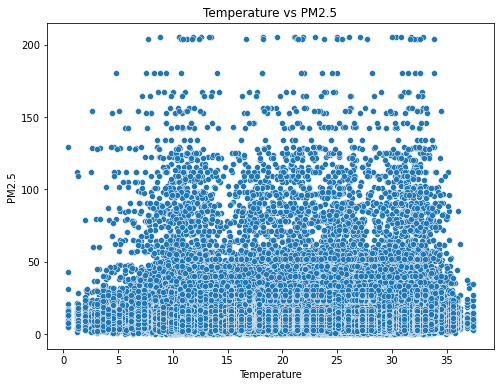

In [85]:
# Scatter plot between air quality and temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='apparent_temperature_mean', y='pm2_5', data=merged_data)
plt.title('Temperature vs PM2.5')
plt.xlabel('Temperature')
plt.ylabel('PM2.5')
plt.show()

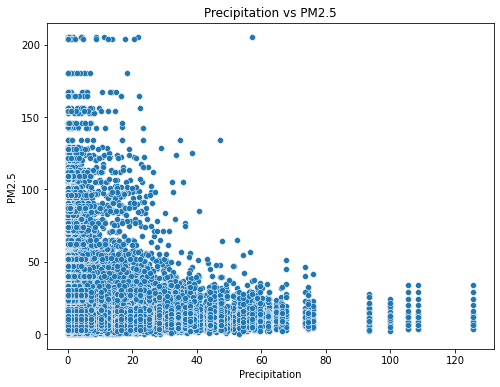

In [86]:
# Scatter plot between air quality and precipitation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='precipitation_sum', y='pm2_5', data=merged_data)
plt.title('Precipitation vs PM2.5')
plt.xlabel('Precipitation')
plt.ylabel('PM2.5')
plt.show()

In [87]:
# Regression analysis between air quality and temperature
X_air_temp = sm.add_constant(merged_data['precipitation_sum'])
model_air_temp = sm.OLS(merged_data['pm2_5'], X_air_temp).fit()
print(model_air_temp.summary())

                            OLS Regression Results                            
Dep. Variable:                  pm2_5   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.488
Date:                Sun, 04 Aug 2024   Prob (F-statistic):              0.115
Time:                        15:09:25   Log-Likelihood:            -9.7853e+05
No. Observations:              252800   AIC:                         1.957e+06
Df Residuals:                  252798   BIC:                         1.957e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.7409      0.02

In [88]:
# Regression analysis between air quality and precipitation
X_air_precip = sm.add_constant(merged_data['precipitation_sum'])
model_air_precip = sm.OLS(merged_data['pm2_5'], X_air_precip).fit()
print(model_air_precip.summary())

                            OLS Regression Results                            
Dep. Variable:                  pm2_5   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.488
Date:                Sun, 04 Aug 2024   Prob (F-statistic):              0.115
Time:                        15:09:25   Log-Likelihood:            -9.7853e+05
No. Observations:              252800   AIC:                         1.957e+06
Df Residuals:                  252798   BIC:                         1.957e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.7409      0.02

# The end